In [28]:
from knapsack import *
from generate_item_list import generate_items

import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [29]:
def test_hill_climbing(problem, max_capacity, n_iters=15):
    best_solution = None
    best_solution_score = float("-inf")

    average_runtime = 0

    for _ in range(n_iters):
        start_time = time.perf_counter()

        init_state = np.random.randint(2, size=len(problem["names"])).tolist()

        solution = hill_climbing(init_state, problem, max_capacity)

        end_time = time.perf_counter()

        average_runtime += end_time - start_time

        solution_score = calculate_fitness(
            solution, problem["prices"], problem["weights"], max_capacity
        )
        if solution_score > best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    average_runtime /= n_iters

    return average_runtime, best_solution, best_solution_score


In [30]:

def test_simulated_annealing(problem, max_capacity, n_iters=15):
    best_solution = None
    best_solution_score = float("-inf")

    average_runtime = 0

    for _ in range(n_iters):
        start_time = time.perf_counter()

        init_state = np.random.randint(2, size=len(problem["names"])).tolist()

        solution = simulated_annealing(init_state, problem, max_capacity)

        end_time = time.perf_counter()

        average_runtime += end_time - start_time

        solution_score = calculate_fitness(
            solution, problem["prices"], problem["weights"], max_capacity
        )
        if solution_score > best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    average_runtime /= n_iters

    return average_runtime, best_solution, best_solution_score


In [31]:

def test_genetic_algorithm(problem, max_capacity, n_iters=15):
    best_solution = None
    best_solution_score = float("-inf")

    average_runtime = 0

    for _ in range(n_iters):
        start_time = time.perf_counter()

        initial_population = generate_population(problem["counts"], population_size=200)

        solution = genetic_algorithm(problem, initial_population, max_capacity)

        end_time = time.perf_counter()

        average_runtime += end_time - start_time

        solution_score = calculate_fitness(
            solution, problem["prices"], problem["weights"], max_capacity
        )
        if solution_score > best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    average_runtime /= n_iters

    return average_runtime, best_solution, best_solution_score


In [32]:

def test():
    filenames = ["10_items.txt", "15_items.txt", "20_items.txt"]

    generate_items(filenames[0], n_item_types=10)
    generate_items(filenames[1], n_item_types=15)
    generate_items(filenames[2], n_item_types=20)   

    result = {} 

    for filename in filenames:
        print(f"Running test on {filename}")

        max_capacity, problem = load_knapsack_problem(filename)

        hc_time, _, hc_score = test_hill_climbing(problem, max_capacity)
        sa_time, _, sa_score = test_simulated_annealing(problem, max_capacity)
        ga_time, _, ga_score = test_genetic_algorithm(problem, max_capacity)

        result[int(filename.split("_")[0])] = {
            "HC.": [hc_time, hc_score],
            "SA.": [sa_time, sa_score],
            "GA.": [ga_time, ga_score]
        }

        print("\n%20s    Time(s)   Value" % "Algorithm")
        print("=============================================")
        print("%20s    %.2f s   %.2f $" % ("Hill climbing", hc_time, hc_score))
        print("%20s    %.2f s   %.2f $" % ("Simulated annealing", sa_time, sa_score))
        print("%20s    %.2f s   %.2f $" % ("Genetic algorithm", ga_time, ga_score))
        print("\n")

    return result


In [33]:
result = test()

Running test on 10_items.txt

           Algorithm    Time(s)   Value
       Hill climbing    0.02 s   293.99 $
 Simulated annealing    0.36 s   243.98 $
   Genetic algorithm    1.39 s   293.99 $


Running test on 15_items.txt

           Algorithm    Time(s)   Value
       Hill climbing    0.07 s   670.97 $
 Simulated annealing    0.68 s   501.21 $
   Genetic algorithm    1.47 s   811.77 $


Running test on 20_items.txt

           Algorithm    Time(s)   Value
       Hill climbing    0.19 s   1426.77 $
 Simulated annealing    1.10 s   653.25 $
   Genetic algorithm    1.56 s   1320.25 $




<BarContainer object of 9 artists>

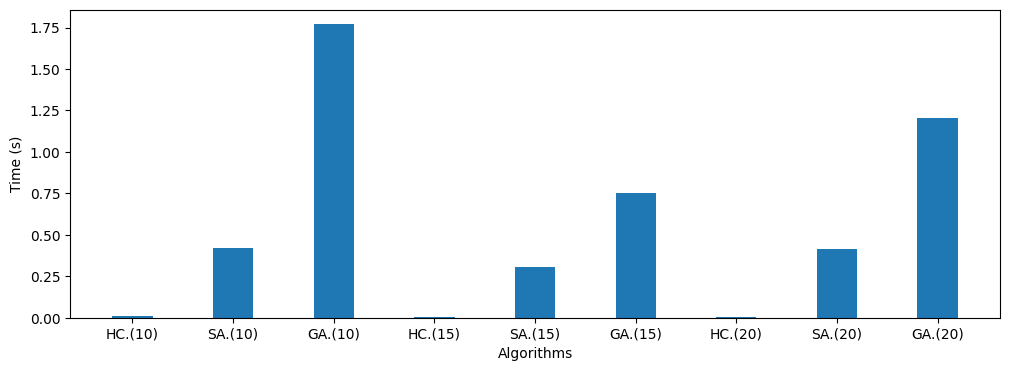

In [34]:

x = []
y_times = []
y_score = []

fig = plt.subplots(figsize =(12, 4))
for n_items, res in result.items():
    algs = map(lambda a: f"{a}({n_items})", res.keys())
    times = list(map(lambda x: x[0], res.values()))
    score = list(map(lambda x: x[1], res.values()))

    x.extend(algs)
    y_times.extend(times)
    y_score.extend(score)

plt.xlabel(f"Algorithms")
plt.ylabel("Time (s)")
plt.bar(x, y_times, width = 0.4)


<BarContainer object of 9 artists>

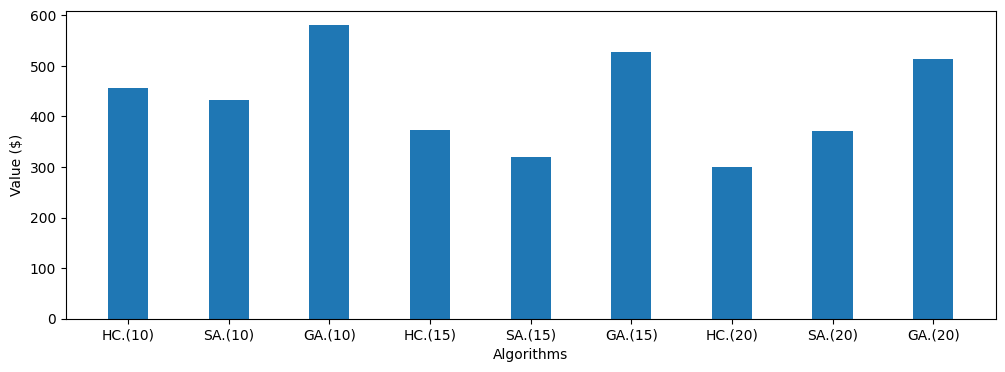

In [35]:
fig = plt.subplots(figsize =(12, 4))
plt.xlabel(f"Algorithms")
plt.ylabel("Value ($)")
plt.bar(x, y_score, width = 0.4)